# 1. Loading the data
## Unzip dataset

In [ ]:
import zipfile
with zipfile.ZipFile("CORD-19-research-challenge.zip", 'r') as zip_ref:
    zip_ref.extractall("week3/CORD-19-research-challenge")

## 1.1 Importing packages

In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
import json

import matplotlib.pyplot as plt
plt.style.use('ggplot')

## 1.2 Importing metadata of dataset

In [24]:
root_path = '/week3/CORD-19-research-challenge'
metadata_path = f'{root_path}/metadata.csv'
meta_df = pd.read_csv(metadata_path, dtype={
    'pubmed_id': str,
    'Microsoft Academic Paper ID': str, 
    'doi': str
})
meta_df.head()

C:\Users\Natalja\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,arxiv_id,has_pdf_parse,has_pmc_xml_parse,full_text_file,url
0,zjufx4fo,b2897e1277f56641193a6db73825f707eed3e4c9,PMC,Sequence requirements for RNA strand transfer ...,10.1093/emboj/20.24.7220,PMC125340,11742998,unk,Nidovirus subgenomic mRNAs contain a leader se...,2001-12-17,"Pasternak, Alexander O.; van den Born, Erwin; ...",The EMBO Journal,NaN,NaN,NaN,True,True,custom_license,http://europepmc.org/articles/pmc125340?pdf=re...
1,ymceytj3,e3d0d482ebd9a8ba81c254cc433f314142e72174,PMC,"Crystal structure of murine sCEACAM1a[1,4]: a ...",10.1093/emboj/21.9.2076,PMC125375,11980704,unk,CEACAM1 is a member of the carcinoembryonic an...,2002-05-01,"Tan, Kemin; Zelus, Bruce D.; Meijers, Rob; Liu...",The EMBO Journal,NaN,NaN,NaN,True,True,custom_license,http://europepmc.org/articles/pmc125375?pdf=re...
2,wzj2glte,00b1d99e70f779eb4ede50059db469c65e8c1469,PMC,Synthesis of a novel hepatitis C virus protein...,10.1093/emboj/20.14.3840,PMC125543,11447125,no-cc,Hepatitis C virus (HCV) is an important human ...,2001-07-16,"Xu, Zhenming; Choi, Jinah; Yen, T.S.Benedict; ...",EMBO J,NaN,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...
3,2sfqsfm1,cf584e00f637cbd8f1bb35f3f09f5ed07b71aeb0,PMC,Structure of coronavirus main proteinase revea...,10.1093/emboj/cdf327,PMC126080,12093723,unk,The key enzyme in coronavirus polyprotein proc...,2002-07-01,"Anand, Kanchan; Palm, Gottfried J.; Mesters, J...",The EMBO Journal,NaN,NaN,NaN,True,True,custom_license,http://europepmc.org/articles/pmc126080?pdf=re...
4,i0zym7iq,dde02f11923815e6a16a31dd6298c46b109c5dfa,PMC,Discontinuous and non-discontinuous subgenomic...,10.1093/emboj/cdf635,PMC136939,12456663,unk,"Arteri-, corona-, toro- and roniviruses are ev...",2002-12-01,"van Vliet, A.L.W.; Smits, S.L.; Rottier, P.J.M...",The EMBO Journal,NaN,NaN,NaN,True,True,custom_license,http://europepmc.org/articles/pmc136939?pdf=re...


## visualize metadata summary

In [25]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59887 entries, 0 to 59886
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   cord_uid                     59887 non-null  object
 1   sha                          45763 non-null  object
 2   source_x                     59887 non-null  object
 3   title                        59724 non-null  object
 4   doi                          55801 non-null  object
 5   pmcid                        48139 non-null  object
 6   pubmed_id                    41328 non-null  object
 7   license                      59887 non-null  object
 8   abstract                     48757 non-null  object
 9   publish_time                 59879 non-null  object
 10  authors                      57296 non-null  object
 11  journal                      52828 non-null  object
 12  Microsoft Academic Paper ID  964 non-null    object
 13  WHO #Covidence               17

## Path to dataset of json files

In [26]:
all_json = glob.glob(f'{root_path}/**/*.json', recursive=True)
len(all_json)

71261

##  1.3 Define Helper functions
### 1.3.1 File Reader Class

In [27]:
class FileReader:
    def __init__(self, file_path):
        with open(file_path) as file:
            content = json.load(file)
            self.paper_id = content['paper_id']
            self.abstract = []
            self.body_text = []
            # Abstract
            for entry in content['abstract']:
                self.abstract.append(entry['text'])
            # Body text
            for entry in content['body_text']:
                self.body_text.append(entry['text'])
            self.abstract = '\n'.join(self.abstract)
            self.body_text = '\n'.join(self.body_text)
    def __repr__(self):
        return f'{self.paper_id}: {self.abstract[:200]}... {self.body_text[:200]}...'
first_row = FileReader(all_json[0])
print(first_row)

003d2e515e1aaf06f0052769953e861ed8e56608: ... It is highly contagious, and severe cases can lead to acute respiratory distress or multiple organ failure [3] . On 11 March 2020, the WHO has made the assessment that COVID-19 can be characterised as...


### 1.3.2 Function for word breaks
#### This functioin adds break after every words when character length reach to certain amount. This is for the interactive plot so that hover tool fits the screen.

In [28]:
def get_breaks(content, length):
    data = ""
    words = content.split(' ')
    total_chars = 0

    # add break every length characters
    for i in range(len(words)):
        total_chars += len(words[i])
        if total_chars > length:
            data = data + "<br>" + words[i]
            total_chars = 0
        else:
            data = data + " " + words[i]
    return data

## 1.4 Load the Data into DataFrame

In [29]:
dict_ = {'paper_id': [], 'doi':[], 'abstract': [], 'body_text': [], 'authors': [], 'title': [], 'journal': [], 'abstract_summary': []}
for idx, entry in enumerate(all_json):
    if idx % (len(all_json) // 10) == 0:
        print(f'Processing index: {idx} of {len(all_json)}')
    
    try:
        content = FileReader(entry)
    except Exception as e:
        continue  # invalid paper format, skip
    
    # get metadata information
    meta_data = meta_df.loc[meta_df['sha'] == content.paper_id]
    # no metadata, skip this paper
    if len(meta_data) == 0:
        continue
    
    dict_['abstract'].append(content.abstract)
    dict_['paper_id'].append(content.paper_id)
    dict_['body_text'].append(content.body_text)
    
    # also create a column for the summary of abstract to be used in a plot
    if len(content.abstract) == 0: 
        # no abstract provided
        dict_['abstract_summary'].append("Not provided.")
    elif len(content.abstract.split(' ')) > 100:
        # abstract provided is too long for plot, take first 100 words append with ...
        info = content.abstract.split(' ')[:100]
        summary = get_breaks(' '.join(info), 40)
        dict_['abstract_summary'].append(summary + "...")
    else:
        # abstract is short enough
        summary = get_breaks(content.abstract, 40)
        dict_['abstract_summary'].append(summary)
        
    # get metadata information
    meta_data = meta_df.loc[meta_df['sha'] == content.paper_id]
    
    try:
        # if more than one author
        authors = meta_data['authors'].values[0].split(';')
        if len(authors) > 2:
            # if more than 2 authors, take them all with html tag breaks in between
            dict_['authors'].append(get_breaks('. '.join(authors), 40))
        else:
            # authors will fit in plot
            dict_['authors'].append(". ".join(authors))
    except Exception as e:
        # if only one author - or Null valie
        dict_['authors'].append(meta_data['authors'].values[0])
    
    # add the title information, add breaks when needed
    try:
        title = get_breaks(meta_data['title'].values[0], 40)
        dict_['title'].append(title)
    # if title was not provided
    except Exception as e:
        dict_['title'].append(meta_data['title'].values[0])
    
    # add the journal information
    dict_['journal'].append(meta_data['journal'].values[0])
    
    # add doi
    dict_['doi'].append(meta_data['doi'].values[0])
    
df_covid = pd.DataFrame(dict_, columns=['paper_id', 'doi', 'abstract', 'body_text', 'authors', 'title', 'journal', 'abstract_summary'])

Processing index: 0 of 71261
Processing index: 7126 of 71261
Processing index: 14252 of 71261
Processing index: 21378 of 71261
Processing index: 28504 of 71261
Processing index: 35630 of 71261
Processing index: 42756 of 71261
Processing index: 49882 of 71261
Processing index: 57008 of 71261
Processing index: 64134 of 71261
Processing index: 71260 of 71261


## 1.5 Some feature engineering

In [30]:
df_covid['abstract_word_count'] = df_covid['abstract'].apply(lambda x: len(x.strip().split()))  # word count in abstract
df_covid['body_word_count'] = df_covid['body_text'].apply(lambda x: len(x.strip().split()))  # word count in body
df_covid['body_unique_words']=df_covid['body_text'].apply(lambda x:len(set(str(x).split())))  # number of unique words in body
df_covid.head()

,paper_id,doi,abstract,body_text,authors,title,journal,abstract_summary,abstract_word_count,body_word_count,body_unique_words
0,003d2e515e1aaf06f0052769953e861ed8e56608,NaN,,"It is highly contagious, and severe cases can ...",Shaoping Hu. Yuan Gao. Zhangming Niu. Ying...,Weakly Supervised Deep Learning for COVID-19<...,NaN,Not provided.,0,4007,1408
1,00a407540a8bdd6d7425bd8a561eb21d69682511,NaN,Rapidly developed AI-based automated CT image ...,• For Coronavirus patients the system outputs ...,Ophir Gozes. Maayan Frid-Adar. Hayit<br>Gre...,Rapid AI Development Cycle for the Coronaviru...,NaN,Rapidly developed AI-based automated CT image...,102,2060,819
2,00c386ee8b9fac7eeb2291a72d52966d83eec814,NaN,It is shown that the evaporation rate of a liq...,It is shown that the evaporation rate of a liq...,P. Grinchuk S.. E. Fisenko I.. S. Fisenko P...,Isothermal evaporation rate of deposited<br>l...,NaN,It is shown that the evaporation rate of a li...,119,3140,943
3,024b30561568979f525d8b2580f85122c02008a0,NaN,A model of reactive social distancing in epide...,Let the proportions of a population who are su...,Rose Baker,Reactive Social distancing in a SIR model of<...,NaN,A model of reactive social distancing in<br>e...,53,952,426
4,02b3c0c87a6b32d5107a6e05f83f73cb7f939432,NaN,Large scale disease screening is a complicated...,In many cohort studies specimens collected fro...,Gregory Haber. Yaakov Malinovsky. Paul Albe...,Is Group Testing Ready for Prime-time in<br>D...,NaN,Large scale disease screening is a complicate...,1255,4439,1121


# 1.6 Data summary

In [31]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43329 entries, 0 to 43328
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   paper_id             43329 non-null  object
 1   doi                  42266 non-null  object
 2   abstract             43329 non-null  object
 3   body_text            43329 non-null  object
 4   authors              42633 non-null  object
 5   title                43291 non-null  object
 6   journal              39612 non-null  object
 7   abstract_summary     43329 non-null  object
 8   abstract_word_count  43329 non-null  int64 
 9   body_word_count      43329 non-null  int64 
 10  body_unique_words    43329 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 3.6+ MB


In [32]:
df_covid['abstract'].describe(include='all')

count     43329
unique    30958
top            
freq      12271
Name: abstract, dtype: object

# 2. Data Pre-processing
## 2.1 Remove duplicates

In [33]:
df_covid.drop_duplicates(['abstract', 'body_text'], inplace=True)
df_covid['abstract'].describe(include='all')

count     43297
unique    30958
top            
freq      12254
Name: abstract, dtype: object

In [34]:
df_covid['body_text'].describe(include='all')

count                              43297
unique                             43288
top       J o u r n a l P r e -p r o o f
freq                                   3
Name: body_text, dtype: object

In [35]:
df_covid.head()

,paper_id,doi,abstract,body_text,authors,title,journal,abstract_summary,abstract_word_count,body_word_count,body_unique_words
0,003d2e515e1aaf06f0052769953e861ed8e56608,NaN,,"It is highly contagious, and severe cases can ...",Shaoping Hu. Yuan Gao. Zhangming Niu. Ying...,Weakly Supervised Deep Learning for COVID-19<...,NaN,Not provided.,0,4007,1408
1,00a407540a8bdd6d7425bd8a561eb21d69682511,NaN,Rapidly developed AI-based automated CT image ...,• For Coronavirus patients the system outputs ...,Ophir Gozes. Maayan Frid-Adar. Hayit<br>Gre...,Rapid AI Development Cycle for the Coronaviru...,NaN,Rapidly developed AI-based automated CT image...,102,2060,819
2,00c386ee8b9fac7eeb2291a72d52966d83eec814,NaN,It is shown that the evaporation rate of a liq...,It is shown that the evaporation rate of a liq...,P. Grinchuk S.. E. Fisenko I.. S. Fisenko P...,Isothermal evaporation rate of deposited<br>l...,NaN,It is shown that the evaporation rate of a li...,119,3140,943
3,024b30561568979f525d8b2580f85122c02008a0,NaN,A model of reactive social distancing in epide...,Let the proportions of a population who are su...,Rose Baker,Reactive Social distancing in a SIR model of<...,NaN,A model of reactive social distancing in<br>e...,53,952,426
4,02b3c0c87a6b32d5107a6e05f83f73cb7f939432,NaN,Large scale disease screening is a complicated...,In many cohort studies specimens collected fro...,Gregory Haber. Yaakov Malinovsky. Paul Albe...,Is Group Testing Ready for Prime-time in<br>D...,NaN,Large scale disease screening is a complicate...,1255,4439,1121


In [36]:
df_covid.describe()

,abstract_word_count,body_word_count,body_unique_words
count,43297.000000,43297.000000,43297.000000
mean,157.314156,4529.339793,1377.119477
std,174.913937,7065.912454,1188.996973
min,0.000000,1.000000,1.000000
25%,0.000000,2179.000000,846.000000
50%,153.000000,3485.000000,1194.000000
75%,233.000000,5269.000000,1635.000000
max,5370.000000,268982.000000,38298.000000


## 2.2 Limiting the dataset
To reduce the runtime, we limit the dataset to 10.000 instances (as they did in the Kaggle notebook).

In [38]:
df = df_covid.sample(10000, random_state=42)
del df_covid

## 2.3  Appending metadata of papers from week2
Loading metadata of papers from week2 from csv file as dataframe, preprocessing (stripping whitespace, removing <br> char,  adding word counts of abstract, body text and unique words) and appending metadata to a general dataframe containing all the papers), dropping duplicates, data summary

In [39]:
import pandas as pd
df_papers_week2 = pd.read_csv('input/Week2_Papers.csv', sep=';',  dtype={'paper_id' : str, 'doi' : str, 'abstract' : str, 'body_text' : str, 'authors' : str, 'title' : str, 'journal' : str, 'abstract_summary' : str})
for column in df_papers_week2:
    df_papers_week2[column]= df_papers_week2[column].apply(lambda x: x.strip())
df_papers_week2
df_papers_week2['title']=df_papers_week2['title'].str.replace('<br>',' ')
df_papers_week2.drop_duplicates(subset='title', keep='first', inplace=True)
df_papers_week2['abstract_word_count'] = df_papers_week2['abstract'].apply(lambda x: len(x.strip().split()))  # word count in abstract
df_papers_week2['body_word_count'] = df_papers_week2['body_text'].apply(lambda x: len(x.strip().split()))  # word count in body
df_papers_week2['body_unique_words']=df_papers_week2['body_text'].apply(lambda x:len(set(str(x).split())))  # number of unique words in body
df=df_papers_week2.append(df)
df.drop_duplicates(['abstract', 'body_text'], inplace=True)
df['abstract'].describe(include='all')

count     10005
unique     7205
top            
freq       2794
Name: abstract, dtype: object

## 2.4 Drop Null values

In [40]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8873 entries, 0 to 37453
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   paper_id             8873 non-null   object
 1   doi                  8873 non-null   object
 2   abstract             8873 non-null   object
 3   body_text            8873 non-null   object
 4   authors              8873 non-null   object
 5   title                8873 non-null   object
 6   journal              8873 non-null   object
 7   abstract_summary     8873 non-null   object
 8   abstract_word_count  8873 non-null   int64 
 9   body_word_count      8873 non-null   int64 
 10  body_unique_words    8873 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 831.8+ KB


## 2.5 Handling multiple languages

Next we are going to determine the language of each paper in the dataframe. Not all of the sources are English and the language needs to be identified so that we know how to handle these instances.
### 2.5.1 Language detection

In [41]:
!pip install langdetect
from tqdm import tqdm
from langdetect import detect
from langdetect import DetectorFactory
from tqdm import tqdm
from langdetect import detect
from langdetect import DetectorFactory

# set seed
DetectorFactory.seed = 0

# hold label - language
languages = []

# go through each text
for ii in tqdm(range(0,len(df))):
    # split by space into list, take the first x intex, join with space
    text = df.iloc[ii]['body_text'].split(" ")
    
    lang = "en"
    try:
        if len(text) > 50:
            lang = detect(" ".join(text[:50]))
        elif len(text) > 0:
            lang = detect(" ".join(text[:len(text)]))
    # ught... beginning of the document was not in a good format
    except Exception as e:
        all_words = set(text)
        try:
            lang = detect(" ".join(all_words))
        # what!! :( let's see if we can find any text in abstract...
        except Exception as e:
            
            try:
                # let's try to label it through the abstract then
                lang = detect(df.iloc[ii]['abstract_summary'])
            except Exception as e:
                lang = "unknown"
                pass
    
    # get the language    
    languages.append(lang)

100%|██████████████████████████████████████████████████████████████████████████████| 8873/8873 [01:43<00:00, 85.33it/s]


In [42]:
from pprint import pprint

languages_dict = {}
for lang in set(languages):
    languages_dict[lang] = languages.count(lang)
    
print("Total: {}\n".format(len(languages)))
pprint(languages_dict)

Total: 8873

{'af': 1,
 'ca': 2,
 'cy': 2,
 'de': 27,
 'en': 8616,
 'es': 95,
 'fr': 109,
 'it': 5,
 'nl': 13,
 'pl': 1,
 'pt': 2}


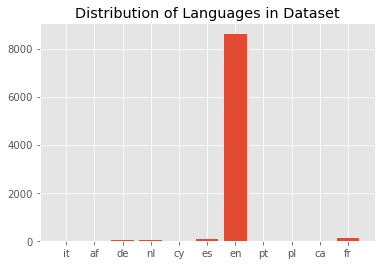

In [43]:
df['language'] = languages
plt.bar(range(len(languages_dict)), list(languages_dict.values()), align='center')
plt.xticks(range(len(languages_dict)), list(languages_dict.keys()))
plt.title("Distribution of Languages in Dataset")
plt.show()

### 2.5.2 Drop any language that is not English

In [44]:
df = df[df['language'] == 'en'] 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8616 entries, 0 to 37453
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   paper_id             8616 non-null   object
 1   doi                  8616 non-null   object
 2   abstract             8616 non-null   object
 3   body_text            8616 non-null   object
 4   authors              8616 non-null   object
 5   title                8616 non-null   object
 6   journal              8616 non-null   object
 7   abstract_summary     8616 non-null   object
 8   abstract_word_count  8616 non-null   int64 
 9   body_word_count      8616 non-null   int64 
 10  body_unique_words    8616 non-null   int64 
 11  language             8616 non-null   object
dtypes: int64(3), object(9)
memory usage: 875.1+ KB


## 2.6 Stopwords

Stopwords = common words that will act as noise in the clustering step
### 2.6.1 Stopword detection

In [45]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import string

In [46]:
punctuations = string.punctuation
stopwords = list(STOP_WORDS)
stopwords[:10]

['not',
 'by',
 'though',
 'moreover',
 'became',
 'at',
 'enough',
 'herein',
 'down',
 'please']

### 2.6.2 Add custom stopwords

In [47]:
custom_stop_words = [
    'doi', 'preprint', 'copyright', 'peer', 'reviewed', 'org', 'https', 'et', 'al', 'author', 'figure', 
    'rights', 'reserved', 'permission', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.', 
    'al.', 'Elsevier', 'PMC', 'CZI', 'www'
]

for w in custom_stop_words:
    if w not in stopwords:
        stopwords.append(w)

# 2.7 Process the text
For this purpose we will be using the spacy library. This function will convert text to lower case, remove punctuation, and find and remove stopwords. For the parser, we will use en_core_sci_lg. This is a model for processing biomedical, scientific or clinical text.

### 2.7.1 Install required packages

In [48]:
# Download the spacy bio parser

from IPython.utils import io
with io.capture_output() as captured:
    !pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_core_sci_lg-0.2.4.tar.gz
# NLP
import en_core_sci_lg  # model downloaded in previous step

  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_core_sci_lg-0.2.4.tar.gz (500.6 MB)
  Created wheel for en-core-sci-lg: filename=en_core_sci_lg-0.2.4-py3-none-any.whl size=501343165 sha256=c8fa9929cea232cae03a75d6a5943477fb32b65ce43e911157d8f7d24b948284
  Stored in directory: c:\users\natalja\appdata\local\pip\cache\wheels\06\a3\b5\bacce7d280488beaf177c3eadbe9f440244201544a0461f6f3
Successfully built en-core-sci-lg


### 2.7.2 Define the parser

In [49]:
# Parser
parser = en_core_sci_lg.load(disable=["tagger", "ner"])
parser.max_length = 7000000

def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    mytokens = " ".join([i for i in mytokens])
    return mytokens

### 2.7.3 Applying the text-processing function on the body_text

In [50]:
tqdm.pandas()
df["processed_text"] = df["body_text"].progress_apply(spacy_tokenizer)

C:\Users\Natalja\anaconda3\lib\site-packages\tqdm\std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|████████████████████████████████████████████████████████████████████████████| 8616/8616 [2:05:44<00:00,  1.14it/s]


# 2.8 Investigate word count 

In [52]:
import seaborn as sns

count      8616.000000
mean       4428.842618
std        5015.453853
min          21.000000
25%        2315.750000
50%        3615.500000
75%        5336.000000
max      188793.000000
Name: body_word_count, dtype: float64

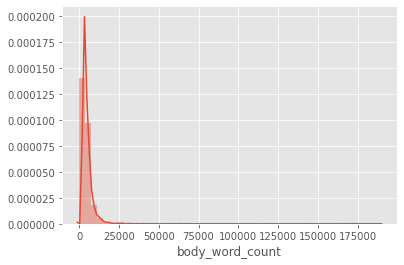

In [53]:
sns.distplot(df['body_word_count'])
df['body_word_count'].describe()

count     8616.000000
mean      1376.776927
std        918.270889
min         21.000000
25%        889.000000
50%       1232.000000
75%       1658.000000
max      25156.000000
Name: body_unique_words, dtype: float64

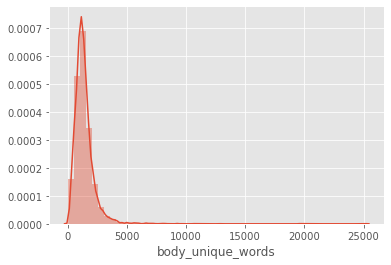

In [54]:
sns.distplot(df['body_unique_words'])
df['body_unique_words'].describe()

# 3. Vectorization
Now that we have pre-processed the data, it is time to convert it into a format that can be handled by our algorithms. For this purpose we will be using tf-idf. This will convert our string formatted data into a measure of how important each word is to the instance out of the literature as a whole.
We will be clustering based on the content of the body text. The maximum number of features will be limited. Only the top 2^12 features will be used, eseentially acting as a noise filter. Additionally, more features cause painfully long runtimes.

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
def vectorize(text, maxx_features):
    
    vectorizer = TfidfVectorizer(max_features=maxx_features)
    X = vectorizer.fit_transform(text)
    return X

In [56]:
text = df['processed_text'].values
X = vectorize(text, 2 ** 12)
X.shape

(8616, 4096)

# 4. PCA and Clustering
Let's see how much we can reduce the dimensions while still keeping 95% variance. We will apply Principle Component Analysis (PCA) to our vectorized data. The reason for this is that by keeping a large number of dimensions with PCA, you don’t destroy much of the information, but hopefully will remove some noise/outliers from the data, and make the clustering problem easier for k-means. Note that X_reduced will only be used for k-means, t-SNE will still use the original feature vector X that was generated through tf-idf on the NLP processed text.

## 4.1 PCA


In [57]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)
X_reduced= pca.fit_transform(X.toarray())
X_reduced.shape

(8616, 2123)

## 4.2 K-Means Clustering
To separate the literature, k-means will be run on the vectorized text. Given the number of clusters, k, k-means will categorize each vector by taking the mean distance to a randomly initialized centroid. The centroids are updated iteratively.

### 4.2.1 Determine best k (number of clusters)

In [58]:
from sklearn.cluster import KMeans

In [59]:
from sklearn import metrics
from scipy.spatial.distance import cdist

# run kmeans with many different k
distortions = []
K = range(2, 50)
for k in K:
    k_means = KMeans(n_clusters=k, random_state=42).fit(X_reduced)
    k_means.fit(X_reduced)
    distortions.append(sum(np.min(cdist(X_reduced, k_means.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    #print('Found distortion for {} clusters'.format(k))


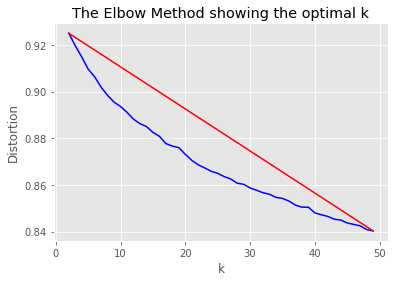

In [60]:
X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# Plot the elbow
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

 In the plot above the elbow is at k=20 indicating the optimal number of clusters for this dataset is 20.

### 4.2.2 Run k-means

In [61]:
k = 20
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_reduced)
df['y'] = y_pred

# 5. Dimensionality reduction
Using t-Distributed Stochastic Neighbor Embedding (t-SNE) we can reduce our high dimensional features vector to 2 dimensions. By using the 2 dimensions as x,y coordinates, the body_text can be plotted.
## 5.1 Reduce to 2 dimensions

In [62]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=100, random_state=42)
X_embedded = tsne.fit_transform(X.toarray())

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 8616 samples in 23.111s...
[t-SNE] Computed neighbors for 8616 samples in 689.884s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8616
[t-SNE] Computed conditional probabilities for sample 2000 / 8616
[t-SNE] Computed conditional probabilities for sample 3000 / 8616
[t-SNE] Computed conditional probabilities for sample 4000 / 8616
[t-SNE] Computed conditional probabilities for sample 5000 / 8616
[t-SNE] Computed conditional probabilities for sample 6000 / 8616
[t-SNE] Computed conditional probabilities for sample 7000 / 8616
[t-SNE] Computed conditional probabilities for sample 8000 / 8616
[t-SNE] Computed conditional probabilities for sample 8616 / 8616
[t-SNE] Mean sigma: 0.375410
[t-SNE] KL divergence after 50 iterations with early exaggeration: 80.700821
[t-SNE] KL divergence after 1000 iterations: 1.804637


## 5.2 Plot t-SNE results (no labels)

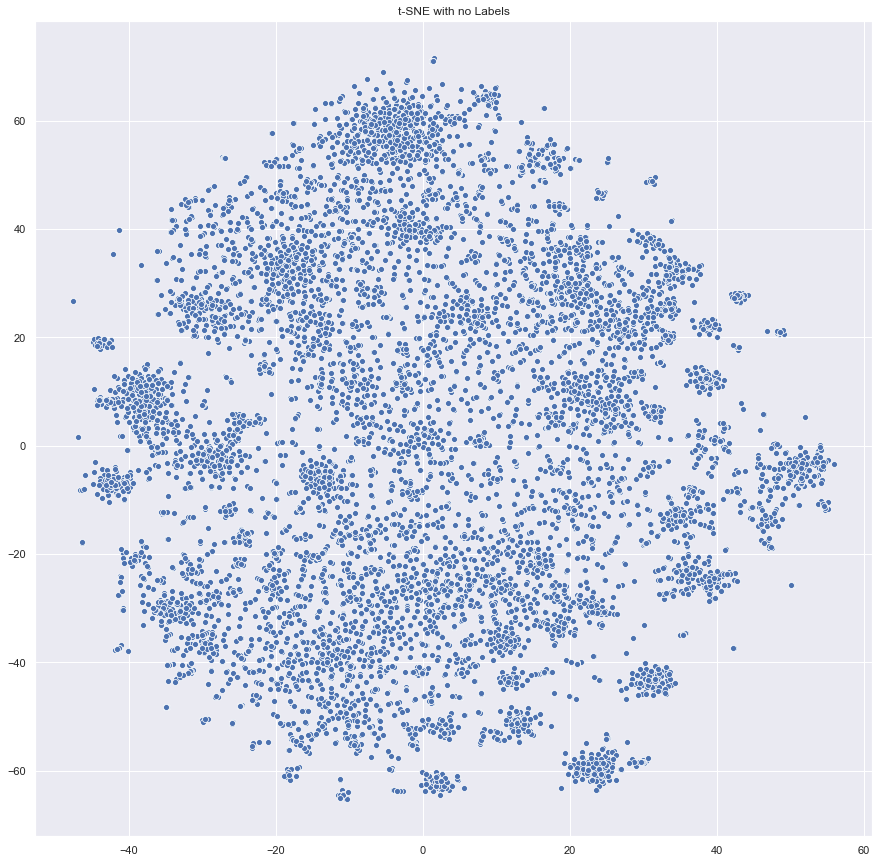

In [63]:
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", 1)

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], palette=palette)
plt.title('t-SNE with no Labels')
plt.savefig("output/t-sne_covid19.png")
plt.show()

## 5.3 Add labels from k-means results

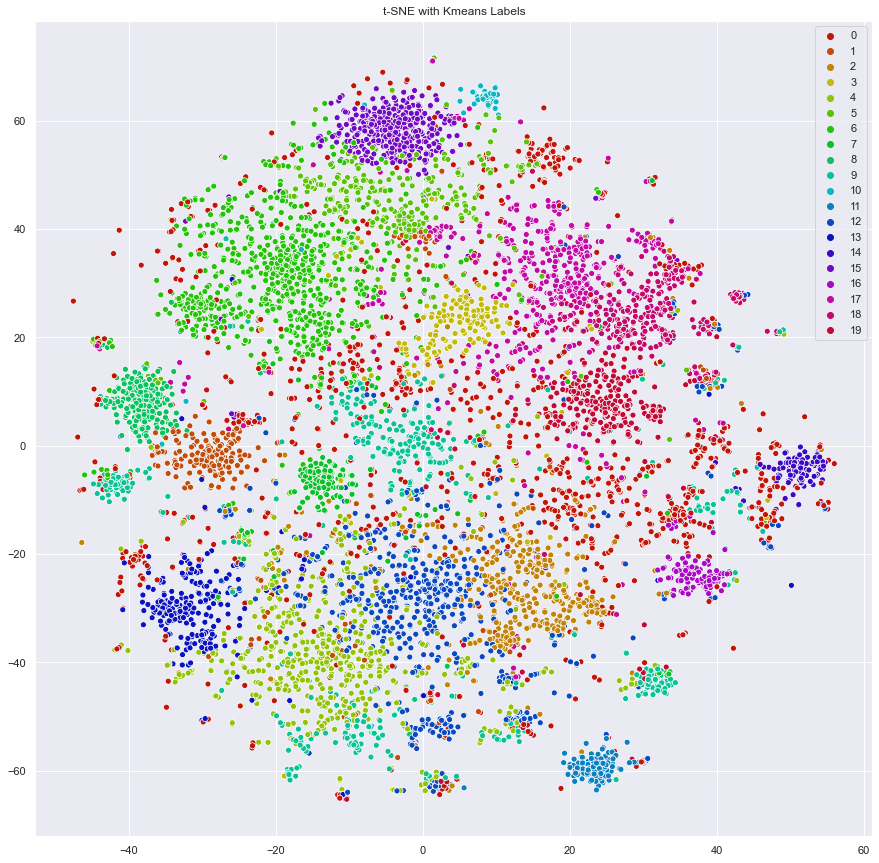

In [64]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.hls_palette(20, l=.4, s=.9)

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title('t-SNE with Kmeans Labels')
plt.savefig("output/improved_cluster_tsne.png")
plt.show()

In [65]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [66]:
vectorizers = []
    
for ii in range(0, 20):
    # Creating a vectorizer
    vectorizers.append(CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}'))

In [67]:
vectorized_data = []

for current_cluster, cvec in enumerate(vectorizers):
    try:
        vectorized_data.append(cvec.fit_transform(df.loc[df['y'] == current_cluster, 'processed_text']))
    except Exception as e:
        print("Not enough instances in cluster: " + str(current_cluster))
        vectorized_data.append(None)

In [68]:
len(vectorized_data)

20

# Identifying of cluster for each week2 paper
using helper function save_cluster_week2_titles clusters of each paper from week2 identified and paper titles of this cluster will be saved in extra .csv-file

In [113]:
def save_cluster_week2_titles(title, table):
    cluster=table.loc[table['title']== title, 'y'].values
    #print(cluster)
    cluster_value=cluster[0]
    print('Cluster {}'.format(cluster_value))
    cluster=table.loc[table['y'] == cluster_value, 'title']
    nameId_week2=table.loc[table['title'] == title, 'paper_id'].values
    nameId_week2=nameId_week2[0]
    print(nameId_week2)
    savePath = 'output/df_covid_cluster_topic_{}.csv'.format(nameId_week2)
    cluster.to_csv(savePath, index = False)
for index, row in df_papers_week2.iterrows():
       print ('Title of week 2 paper is {}'.format(row['title']))
       save_cluster_week2_titles(row['title'], df)

Title of week 2 paper is Spread of Infectious Disease Modeling and Analysis of Different Factors on Spread of Infectious Disease Based on Cellular Automata
Cluster 6
week_2_spreading_models
Title of week 2 paper is Risk Assessment of Novel Coronavirus COVID-19 Outbreaks Outside China
Cluster 6
week_2_risk
Title of week 2 paper is Propagation analysis and prediction of the COVID-19
Cluster 6
week2_forecasting
Title of week 2 paper is Finding COVID-19 from Chest X-rays using Deep Learning on a Small Dataset
Cluster 15
week2_diagnostics
Title of week 2 paper is Identification of a new coronavirus
Cluster 9
week2_phylogenetic_analysis
